<a href="https://colab.research.google.com/github/srushtig172/861_Srushti-Ghadge/blob/main/Srushti_Ghadge_DeepLearningLabAssignment_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Name-Srushti Ghadge**

### **Batch-T1**

### **PRN-202201090125**

# **ACTIVATION FUNCTION:**
The activation function of a node in an artificial neural network is a function that calculates the output of the node based on its individual inputs and their weights.

**SIGMOID FUNCTION:**

Sigmoid is a mathematical function that maps any real-valued number into a value between **0** and **1**

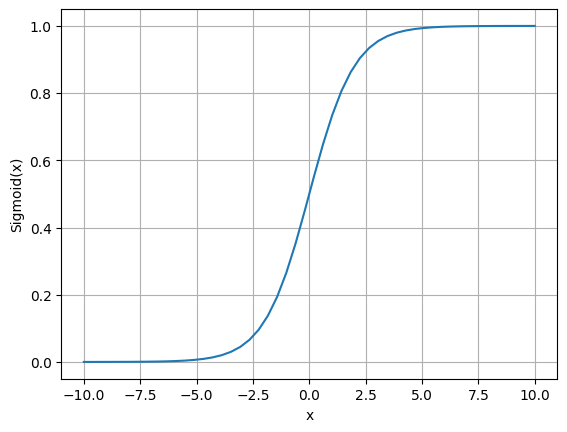

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sig(x):
 return 1/(1 + np.exp(-x))
x = np.linspace(-10, 10, 50)
p = sig(x)
plt.xlabel("x")
plt.ylabel("Sigmoid(x)")
plt.plot(x, p)
plt.grid(True)
plt.show()

**RELU** **FUNCTION:**

 It outputs the input value if it is positive or returns zero.

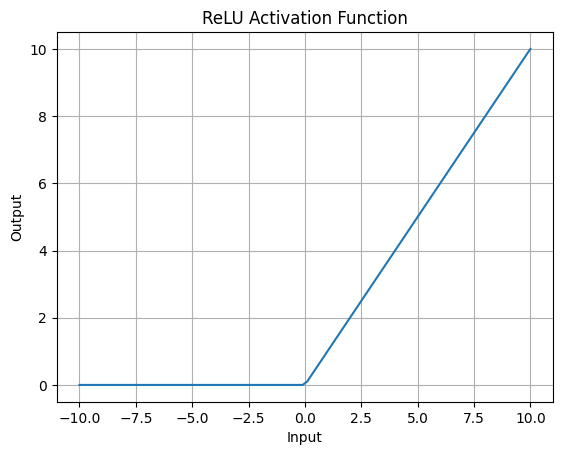

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def relu(x):
    return np.maximum(0, x)

x = np.linspace(-10, 10, 100)
y = relu(x)

plt.plot(x, y)
plt.title('ReLU Activation Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

**TANH FUNCTION:**

S-shaped function like sigmoid, but maps input values between **-1** and **1**.

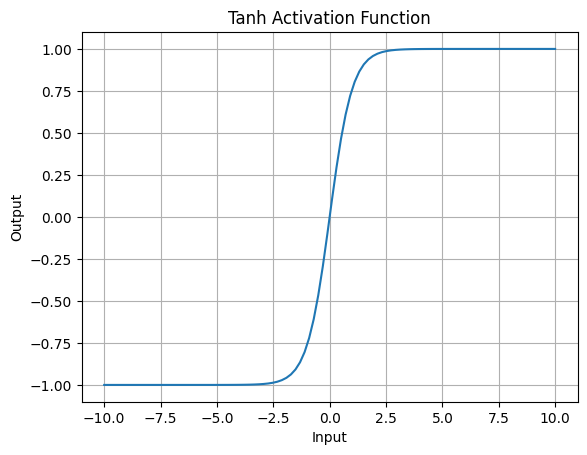

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))
def plot_tanh():
    # Generate values for x
    x = np.linspace(-10, 10, 100)

    # Compute tanh values for corresponding x
    tanh = np.tanh(x)

    # Plot the tanh function
    plt.plot(x, tanh)
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.title('Tanh Activation Function')
    plt.grid(True)
    plt.show()


plot_tanh()

**LOGISTIC REGRESSION:**

It is a supervised machine learning algorithm used for classification tasks where the goal is to predict the probability that an instance belongs to a given class or not.

logistic(0) = 0.5
logistic([-3 -2 -1  0  1  2  6]) = [0.04742587 0.11920292 0.26894142 0.5        0.73105858 0.88079708
 0.99752738]


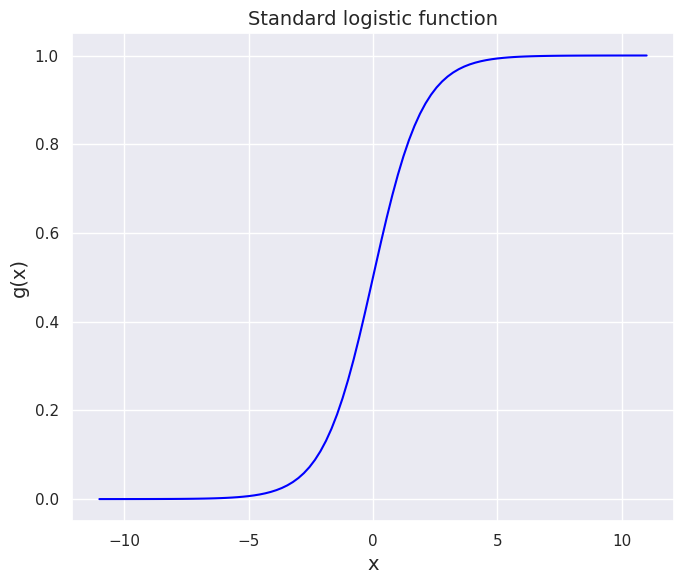

In [ ]:
# Importing libraries
import time, psutil, os, math
from tqdm.contrib import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import train_test_split
# Logistic function
def logistic(x):

    y = 1 / (1 + np.exp(-x))
    return y

x, x_arr = 0, np.array([-3,-2, -1,0, 1, 2,6])
print(f"logistic({x}) = {logistic(x)}")

print(f"logistic({x_arr}) = {logistic(x_arr)}")
# Plotting the logistic function
plt.figure(figsize = (7, 6))
x = np.linspace(-11, 11, 100)

plt.plot(x, logistic(x), color = 'blue')
plt.xlabel("x", fontsize = 14)
plt.ylabel("g(x)", fontsize = 14)
plt.title("Standard logistic function", fontsize = 14)
plt.tight_layout()
plt.show()

**LOGISTIC REGRESSION ON DATASET(FROM LIBRARIES)**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("/content/alzheimers_prediction_dataset.csv")

# Encode categorical variables using Label Encoding
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target variable
X = df.drop(columns=['Alzheimer’s Diagnosis'])  # Features
y = df['Alzheimer’s Diagnosis']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)




Accuracy: 0.7123
Confusion Matrix:
 [[6899 1820]
 [2454 3684]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.79      0.76      8719
           1       0.67      0.60      0.63      6138

    accuracy                           0.71     14857
   macro avg       0.70      0.70      0.70     14857
weighted avg       0.71      0.71      0.71     14857



#**LOG LOSS:**
It is the evaluation measure to check the performance of the classification model.

**LOGISTIC REGRESSION WITH LOG LOSS**

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log-Loss function
def compute_log_loss(y_true, y_pred):
    epsilon = 1e-15  # To avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient Descent for logistic regression
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = X.shape[0]
    for epoch in range(epochs):
        # Predict probabilities
        z = np.dot(X, weights)
        predictions = sigmoid(z)

        # Compute gradients
        gradient = np.dot(X.T, (predictions - y)) / m

        # Update weights
        weights -= learning_rate * gradient

        # Compute and print log loss
        if epoch % 100 == 0:
            log_loss = compute_log_loss(y, predictions)
            print(f"Epoch {epoch}, Log-Loss: {log_loss:.4f}")
    return weights

# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, random_state=42)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add an intercept term (bias) to the features
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Train the logistic regression model
learning_rate = 0.1
epochs = 1000
weights = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

# Make predictions on the test set
z_test = np.dot(X_test, weights)
y_test_pred = sigmoid(z_test)
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# Compute test log-loss and accuracy
test_log_loss = compute_log_loss(y_test, y_test_pred)
accuracy = np.mean(y_test_pred_binary == y_test)
print(f"\nTest Log-Loss: {test_log_loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 0, Log-Loss: 0.6931
Epoch 100, Log-Loss: 0.2705
Epoch 200, Log-Loss: 0.2522
Epoch 300, Log-Loss: 0.2473
Epoch 400, Log-Loss: 0.2455
Epoch 500, Log-Loss: 0.2446
Epoch 600, Log-Loss: 0.2442
Epoch 700, Log-Loss: 0.2440
Epoch 800, Log-Loss: 0.2439
Epoch 900, Log-Loss: 0.2439

Test Log-Loss: 0.1881
Test Accuracy: 0.9250


**KERAS IMPLEMENTATION**

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
# Load dataset
df = pd.read_csv('/content/alzeimer.csv')
# Extract features and target
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
X = df.iloc[:, 1:8].values  # Feature columns
y = df["Alzheimers Diagnosis"].values  # Target labels
le = LabelEncoder()
X[:, 1] = le.fit_transform(X[:, 1])

In [ ]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
# - StandardScaler is used to normalize the features by removing the mean and scaling to unit variance
# - This helps the neural network converge faster and improves performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform it
X_test = scaler.transform(X_test)        # Transform the testing data using the same scaler

In [ ]:

model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 32 neurons and ReLU activation
    Dense(16, activation='relu'),  # Another hidden layer with 16 neurons and ReLU activation
    Dense(1, activation='sigmoid')  # Output layer with 1 neuron and sigmoid activation for binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 0.6941 - val_accuracy: 0.4000 - val_loss: 0.7316
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - accuracy: 0.5000 - loss: 0.6879 - val_accuracy: 0.4000 - val_loss: 0.7302
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.5556 - loss: 0.6818 - val_accuracy: 0.4000 - val_loss: 0.7289
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.6111 - loss: 0.6758 - val_accuracy: 0.4000 - val_loss: 0.7277
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - accuracy: 0.6111 - loss: 0.6699 - val_accuracy: 0.4000 - val_loss: 0.7265
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.7222 - loss: 0.6641 - val_accuracy: 0.6000 - val_loss: 0.7259
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.7222 - loss: 0.6584 - val_accuracy: 0.6000 - val_loss: 0.7253
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.7222 - loss: 0.6529 - val_accuracy: 0.6000 - val_loss: 0.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 1.0000 - loss: 0.5200
Test Loss: 0.5200
Test Accuracy: 1.0000


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



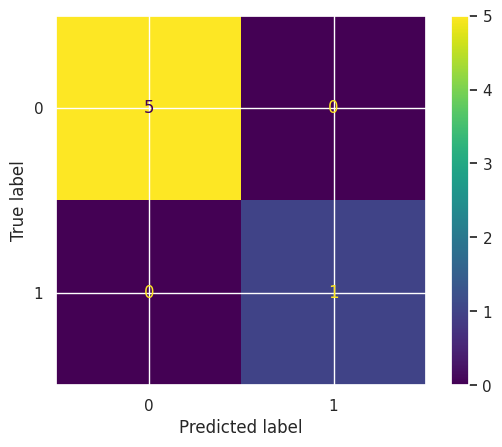

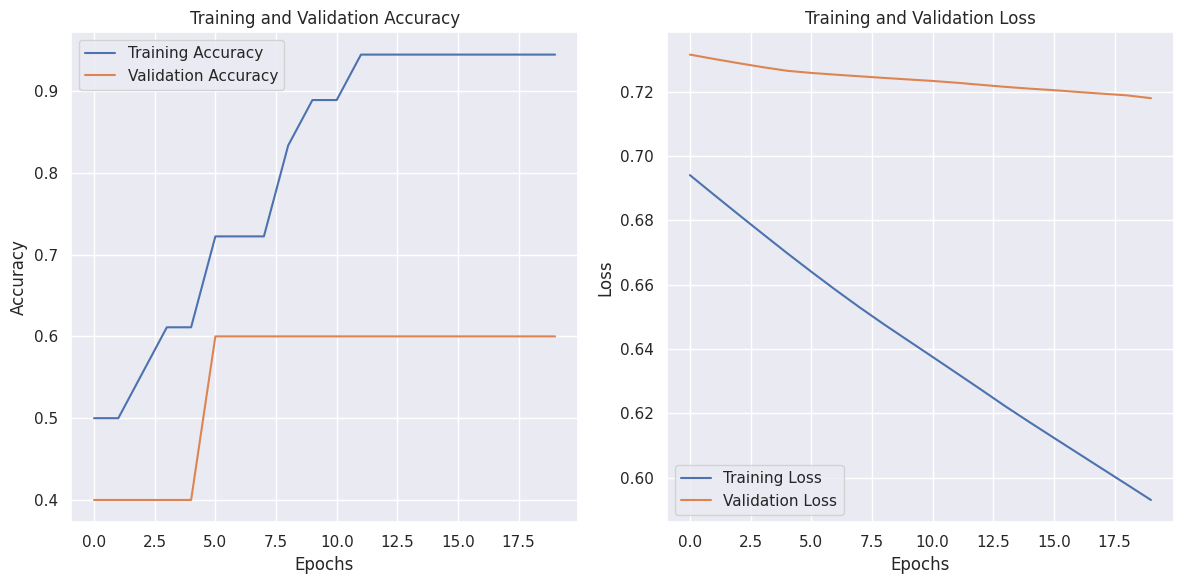

In [ ]:

# Step 7: Classification Report
# Print a detailed classification report with precision, recall, F1-score, and support for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 8: Visualize confusion matrix
# Plot the confusion matrix to visualize model performance in terms of true positives, true negatives, false positives, and false negatives
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Step 9: Plot Training and Validation Loss/Accuracy
# Extract metrics from the history object (collected during training)
acc = history.history['accuracy']        # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']           # Training loss
val_loss = history.history['val_loss']   # Validation loss

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot for accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')  # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Accuracy')                         # Label the y-axis
plt.legend()                                   # Add a legend

# Plot Loss
plt.subplot(1, 2, 2)  # Create the second subplot for loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')      # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Loss')                             # Label the y-axis
plt.legend()                                   # Add a legend

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()


**MLP WITH SKLEARN**

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.33      1.00      0.50         1

    accuracy                           0.67         6
   macro avg       0.67      0.80      0.62         6
weighted avg       0.89      0.67      0.71         6



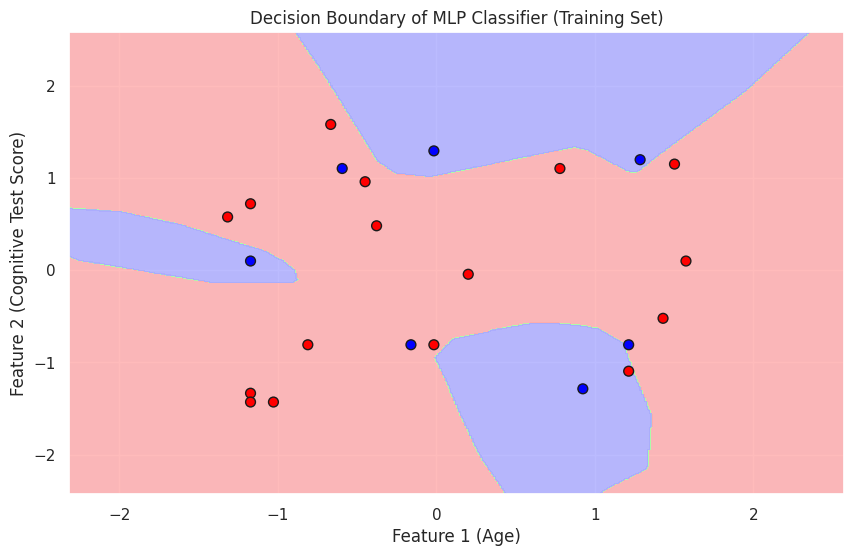

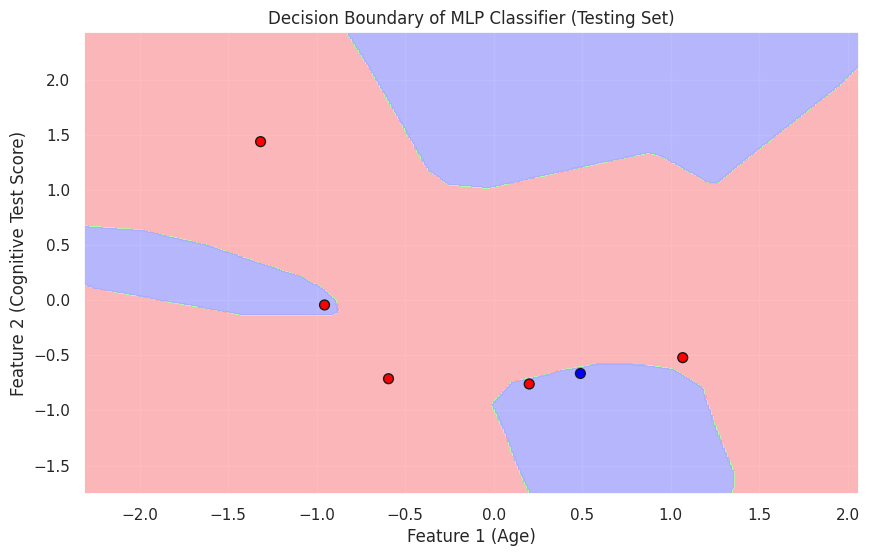

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('/content/alzeimer.csv')

# Encode categorical columns (if any)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Select only two features for visualization
X = df[['Age', 'Cognitive Test Score']]  # Replace with actual column names if needed
y = df['Alzheimers Diagnosis']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(20, 15), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Define color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])  # Light shades for background
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])   # Bold colors for points

# Function to plot decision boundary
def plot_decision_boundary(X, y, model, title, dataset_type):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=50)
    plt.title(f"Decision Boundary of MLP Classifier ({dataset_type} Set)")
    plt.xlabel("Feature 1 (Age)")
    plt.ylabel("Feature 2 (Cognitive Test Score)")
    plt.show()

# Plot decision boundary for training set
plot_decision_boundary(X_train, y_train, mlp, "MLP Classifier", "Training")

# Plot decision boundary for testing set
plot_decision_boundary(X_test, y_test, mlp, "MLP Classifier", "Testing")

**ANN WITH BACKPROPAGATION**

In [ ]:
import math
def sigmoid(x):
  return (1/(1+math.exp(-x)))

def activation(bias,wa,xa,wb,xb):
  summation = bias  + wa*xa + wb*xb
  temp = sigmoid(summation)
  return temp

def form_layers(bias,weights,xa,xb,layer,index):
  if(index==4):
    return
  var = activation(bias,weights[index],xa,weights[index+1],xb)
  layer.append(var)
  index = index + 2
  form_layers(bias,weights,xa,xb,layer,index)

In [ ]:
def feed_forward(b1,b2,w1,w2,x,hidden,output):
  for i in range(2):
    if(i==0): #First layer
      form_layers(b1,w1,x[0],x[1],hidden,0)
    else: #Second layer
      form_layers(b2,w2,hidden[0],hidden[1],output,0)

In [ ]:
def find_error(output,desired):
  sum = 0
  for i in range(len(output)):
    sum = sum + (output[i]-desired[i])**2
  return (sum/2)

In [ ]:
def back_propagate(w1,w2,hidden,output,desired,alpha):
  e_total_by_net_o1 = -(desired[0]-output[0])*(output[0]*(1-output[0]))
  e_total_by_net_o2 = -(desired[1]-output[1])*(output[1]*(1-output[1]))
  differentiated = [e_total_by_net_o1,e_total_by_net_o2]
  #Layer 1 :
  for i in range(len(w1)):
    temp = 0
    temp = temp + (differentiated[0]*w2[math.floor(i/2)] + differentiated[1]*w2[math.floor(i/2)+2])
    temp = temp*hidden[math.floor(i/2)]*(1-hidden[math.floor(i/2)])
    temp = temp * x[i%2]
    w1[i] = w1[i] - alpha*temp

  #Layer 2:
  for i in range(len(w2)):
    temp = 1
    temp = differentiated[math.floor(i/2)] * hidden[i%2]

    w2[i] = w2[i] - alpha*temp

In [ ]:
w1 = [0.15, 0.20, 0.25, 0.30]
w2 = [0.40, 0.45, 0.50, 0.55]
x = [0.05, 0.10]
b1 = 0.35
b2 = 0.60
desired = [0.01,0.99]

epochs = 100
error = []
alpha = 0.5
for i in range(epochs):
  output = []
  hidden = []
  feed_forward(b1,b2,w1,w2,x,hidden,output)
  error.append(find_error(output,desired))
  back_propagate(w1,w2,hidden,output,desired,alpha)


In [ ]:
print(error)

[0.2983711087600027, 0.29102777369359933, 0.28354713312241997, 0.27594328888945185, 0.2682327611533904, 0.2604343927553956, 0.2525691759825399, 0.24465999920966014, 0.23673131551750956, 0.2288087405423599, 0.22091859205390404, 0.21308738853919232, 0.20534132782860484, 0.1977057690450768, 0.19020474155711184, 0.18286050305977403, 0.17569316553702105, 0.1687204030478535, 0.16195724957465668, 0.15541598920395305, 0.14910613528945255, 0.14303449048182013, 0.13720527594166854, 0.13162031583665817, 0.12627926233790177, 0.12117984661240595, 0.11631814250431402, 0.11168883141750102, 0.1072854590712214, 0.10310067705252127, 0.09912646424290343, 0.09535432512163747, 0.09177546356987579, 0.08838093209082147, 0.08516175732884734, 0.08210904344489679, 0.07921405532961884, 0.07646828385714464, 0.0738634954479428, 0.07139176816113443, 0.06904551641113447, 0.06681750622982835, 0.06470086279642512, 0.06268907174949168, 0.060775975591331716, 0.05895576630166304, 0.05722297510020438, 0.05557246013871597,

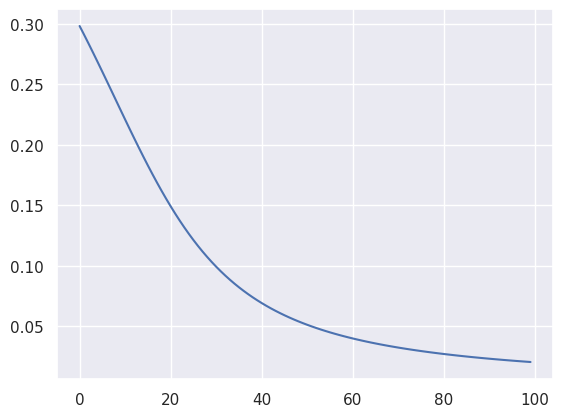

[0.17708103133414513, 0.8772720833299557]


In [ ]:
from matplotlib import pyplot as plt
plt.plot(error)
plt.show()
print(output)

In [ ]:
w1 = [0.15, 0.20, 0.25, 0.30]
w2 = [0.40, 0.45, 0.50, 0.55]
x = [0.05, 0.10]
b1 = 0.35
b2 = 0.60
desired = [0.01,0.99]

epochs = 500
error = []
alpha = 0.5
for i in range(epochs):
  output = []
  hidden = []
  feed_forward(b1,b2,w1,w2,x,hidden,output)
  error.append(find_error(output,desired))
  back_propagate(w1,w2,hidden,output,desired,alpha)


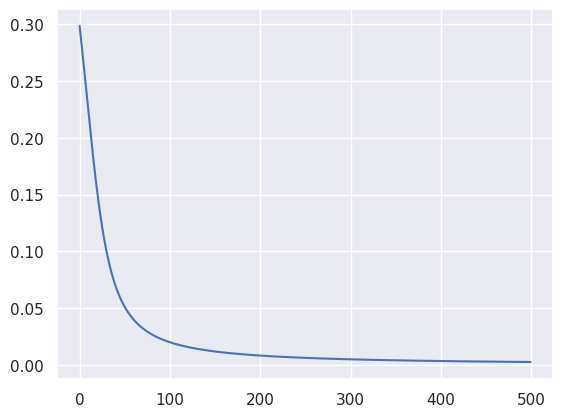

In [ ]:
from matplotlib import pyplot as plt
plt.plot(error)
plt.show()

In [ ]:
w1 = [0.25, 0.25, 0.25, 0.25]
w2 = [0.40, 0.40, 0.40, 0.40]
x = [0.2, 0.15]
b1 = 0.50
b2 = 0.50
desired = [0.01,0.99]

epochs = 500
error = []
alpha = 0.5
for i in range(epochs):
  output = []
  hidden = []
  feed_forward(b1,b2,w1,w2,x,hidden,output)
  error.append(find_error(output,desired))
  back_propagate(w1,w2,hidden,output,desired,alpha)

In [ ]:
print(error)


[0.29478476934187137, 0.2854562816383857, 0.27601271225726254, 0.2664818857356591, 0.25689562716884334, 0.24728917480926035, 0.2377004086107123, 0.228168920813064, 0.21873497116285628, 0.20943838300253878, 0.20031744496075923, 0.19140788471731449, 0.1827419757419751, 0.1743478257037163, 0.16624887822893974, 0.15846364040163924, 0.1510056295778998, 0.14388351710175531, 0.1371014349658066, 0.13065940502912385, 0.12455384888118344, 0.11877813896788533, 0.11332315696746985, 0.10817783234938648, 0.10332964144662811, 0.09876505437117768, 0.0944699231579444, 0.0904298093682753, 0.08663025297069377, 0.08305698674136307, 0.0796961018689217, 0.07653417111751815, 0.07355833600380399, 0.07075636415979378, 0.0681166825320382, 0.06562839142186262, 0.06328126368311718, 0.061065732717929797, 0.058972872281415276, 0.05699437054169579, 0.055122500349536405, 0.053350087252749034, 0.05167047644016432, 0.05007749951184959, 0.0485654417387181, 0.047129010287917536, 0.04576330374295344, 0.044463783132628616,

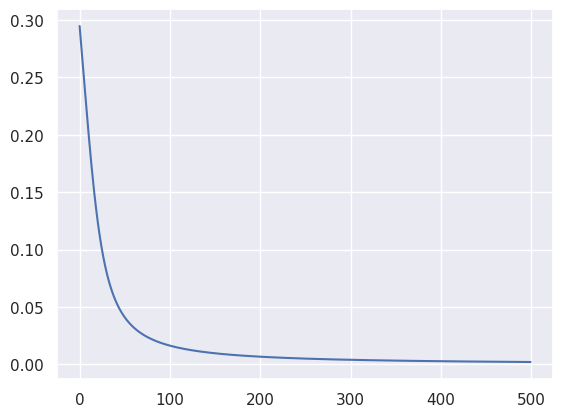

[0.05664331774103019, 0.9456464549728552]


In [ ]:
from matplotlib import pyplot as plt
plt.plot(error)
plt.show()
print(output)

**BACKPROPAGATION**

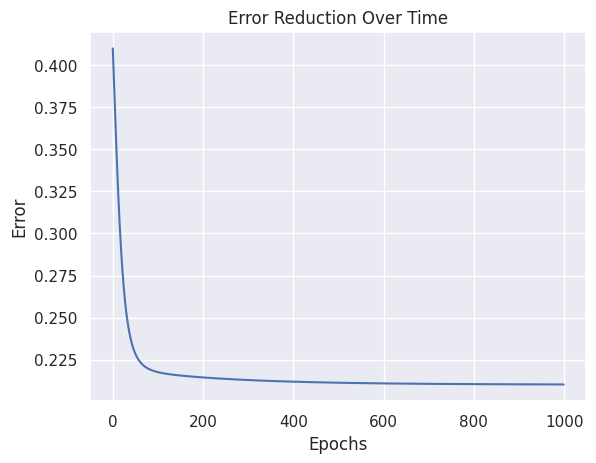

Actual: 65.0, Predicted: 71.87728670203498
Actual: 65.0, Predicted: 70.87914126383244
Actual: 65.0, Predicted: 71.07594727529118
Actual: 85.12375504823538, Predicted: 70.89392705610764
Actual: 65.0, Predicted: 70.93669173132864


In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("/content/alzeimer.csv")

# Separate features and target
X = df[['Cognitive Test Score']].values
y = df[['Alzheimers Diagnosis']].values
le = LabelEncoder()
y = le.fit_transform(y.ravel()) # ravel() is used to flatten the array
y = y.reshape(-1, 1) #
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 +np.exp(-x))

# Derivative of sigmoid
def sigmoid_derivative(x):
    return x * (1 - x)

# Initialize network parameters
input_size = 1
hidden_size = 5
output_size = 1
alpha = 0.01  # Learning rate
epochs = 1000

# Random weight initialization
np.random.seed(42)
w1 = np.random.randn(input_size, hidden_size)
w2 = np.random.randn(hidden_size, output_size)
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

# Training loop
errors = []
for epoch in range(epochs):
    # Forward pass
    hidden_input = np.dot(X_train, w1) + b1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, w2) + b2
    final_output = sigmoid(final_input)

    # Compute error
    error = y_train - final_output
    total_error = np.mean(np.square(error))
    errors.append(total_error)

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    d_hidden = np.dot(d_output, w2.T) * sigmoid_derivative(hidden_output)

    # Update weights and biases
    w2 += np.dot(hidden_output.T, d_output) * alpha
    w1 += np.dot(X_train.T, d_hidden) * alpha
    b2 += np.sum(d_output, axis=0, keepdims=True) * alpha
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * alpha

# Plot error reduction
plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error Reduction Over Time")
plt.show()

# Test the model
hidden_test = sigmoid(np.dot(X_test, w1) + b1)
predicted_salary = sigmoid(np.dot(hidden_test, w2) + b2)

# Rescale predictions to original range
predicted_salary = scaler.inverse_transform(predicted_salary)
y_test_original = scaler.inverse_transform(y_test)

# Print some predictions
for i in range(5):
    print(f"Actual: {y_test_original[i][0]}, Predicted: {predicted_salary[i][0]}")
